In [1]:
%matplotlib inline
import altair as alt
import pandas as pd
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv('abalone.data', names=['Sex','Length',
                                        'Diameter','Height',
                                        'Whole weight', 'Shucked weight', 
                                        'Viscera weight', 'Shell weight', 
                                        'Rings'])

In [6]:
data = data[data.Height > 0]
data = data[data.Height < 0.4]

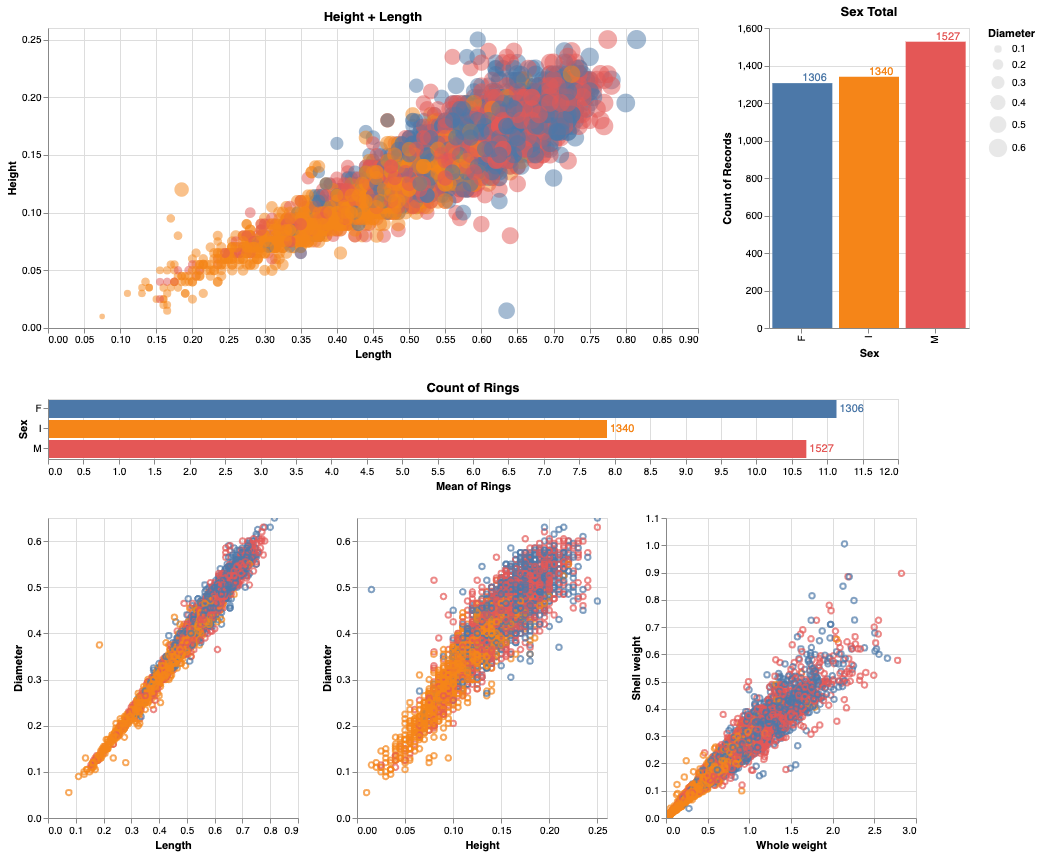

In [53]:
brush = alt.selection(type='interval')
#A = ['M', 'F', 'I']
ratings = ['M', 'F', 'I']

rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['Sex'], bind=rating_radio, name="Sex")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('Sex:N', legend=None),
                      alt.value('lightgray'))


# the top scatterplot
HeightLengthScatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    x='Length:Q',
    y='Height:Q',
    size='Diameter:Q',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650,
    
).add_selection(
    rating_select
).encode(
    color=rating_color_condition,
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
)


# the right Category Bar Chart
sexChart = alt.Chart(title='Sex Total').mark_bar().encode(
    y='count()',
    color='Sex:N',
    x='Sex:N'
).transform_filter(
    brush.ref()
).encode(
    color=rating_color_condition
).properties(
    width=200
)

sexText = sexChart.mark_text(
    align='left',
    baseline='middle',
    dy=-5 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

'''legend = alt.Chart().mark_point().encode(
            y=alt.Y('Sex:N', axis=alt.Axis(orient='right')),
            color='Sex'
).add_selection(
    selection
)'''

noOfRings = alt.Chart(title='Count of Rings').mark_bar().encode(
    x='mean(Rings)',
    y='Sex:N',
    color='Sex:N',
).transform_filter(
    brush.ref()
).properties(
    width = 850, 
    #height = 150
).encode(
    color=rating_color_condition
)

ringText = noOfRings.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

lengthDiameterScatter = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Diameter:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

heightLengthScatter2 = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

heightDiameterScatter = alt.Chart().mark_point().encode(
    x='Height:Q',
    y='Diameter:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

shellWholeWeightScatter = alt.Chart().mark_point().encode(
    y='Shell weight:Q',
    x='Whole weight:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()


chart = alt.vconcat(HeightLengthScatter | (sexChart + sexText), (noOfRings + ringText), lengthDiameterScatter | heightDiameterScatter | shellWholeWeightScatter, data=data)
chart#.transform_sample(sample=1750) #


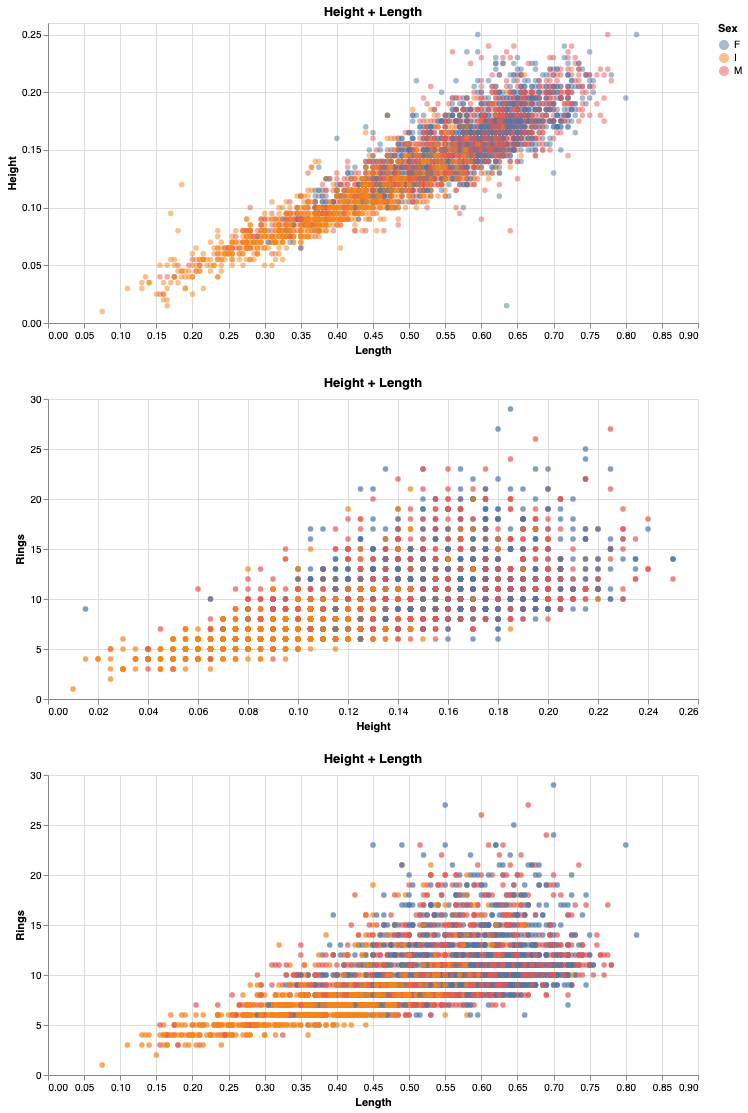

In [31]:
HeightLengthScatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    x='Length:Q',
    y='Height:Q',
    #size='Diameter:Q',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650, 
)

ringsHeightScatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    y='Rings:Q',
    x='Height:Q',
    #size='Diameter:Q',
    #opacity=alt.value(0.5),
    color='Sex:N',#alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
    
).transform_filter(
    brush.ref()
).properties(
    width=650,
    
)

ringsLengthScatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    y='Rings:Q',
    x='Length:Q',
    #size='Diameter:Q',
    #opacity=alt.value(0.5),
    color='Sex:N',#alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
    
).transform_filter(
    brush.ref()
).properties(
    width=650,
    
)

chart = alt.vconcat(HeightLengthScatter, ringsHeightScatter, ringsLengthScatter, data=data)
chart#.transform_sample(sample=1750) #

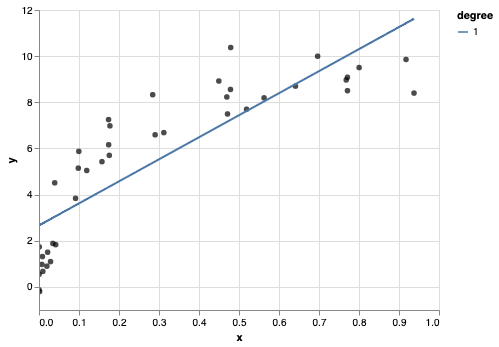

In [33]:
import numpy as np
import pandas as pd
import altair as alt

# Generate some random data
rng = np.random.RandomState(1)
x = rng.rand(40) ** 2
y = 10 - 1. / (x + 0.1) + rng.randn(40)
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1, 3, 5]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the data points on an interactive axis
points = alt.Chart(df).mark_circle(color='black').encode(
    x=alt.X('x', title='x'),
    y=alt.Y('y', title='y')
).interactive()

# Plot the best fit polynomials
polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color='degree:N'
)

points + polynomial_fit

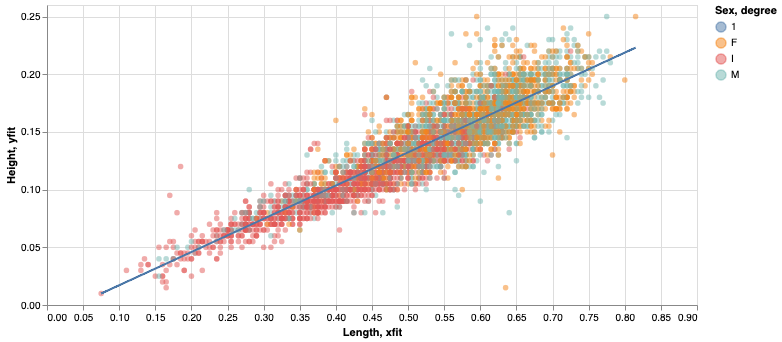

In [48]:
import numpy as np
import pandas as pd
import altair as alt

# Generate some random data

x = data.Length
y = data.Height
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

HeightLengthScatter = alt.Chart(data).mark_point(filled = True).encode(
    x='Length:Q',
    y='Height:Q',
    #size='Diameter:Q',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650, 
)


# Plot the best fit polynomials
polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color='degree:N'
)

HeightLengthScatter + polynomial_fit

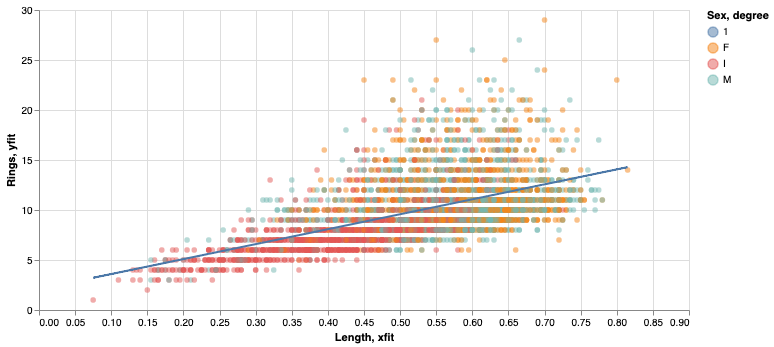

In [49]:
import numpy as np
import pandas as pd
import altair as alt

# Generate some random data

x = data.Length
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

HeightLengthScatter = alt.Chart(data).mark_point(filled = True).encode(
    x='Length:Q',
    y='Rings:Q',
    #size='Diameter:Q',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650, 
)


# Plot the best fit polynomials
polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color='degree:N'
)

HeightLengthScatter + polynomial_fit

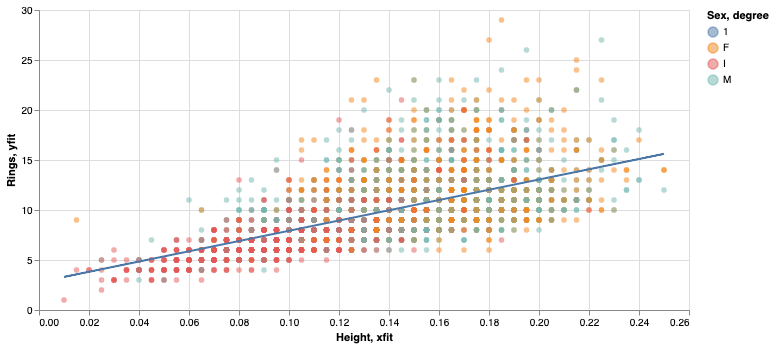

In [51]:
x = data.Height
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

HeightLengthScatter = alt.Chart(data).mark_point(filled = True).encode(
    x='Height:Q',
    y='Rings:Q',
    #size='Diameter:Q',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650, 
)


# Plot the best fit polynomials
polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color='degree:N'
)

HeightLengthScatter + polynomial_fit